In [83]:
import pandas as pd 

In [84]:
df = pd.read_excel("https://github.com/gsteinmetzsilber/DATA-608/raw/main/Story%206/MMG2023_2019-2021_Data_ToShare.xlsx", "State")

print(df.shape)
print(df.describe())
print(df.info())

print(df.isna().sum())


print(df.head())

(153, 32)
             FIPS         Year  Overall Food Insecurity Rate   \
count  153.000000   153.000000                     153.000000   
mean    28.960784  2020.000000                       0.107412   
std     15.728319     0.819178                       0.023878   
min      1.000000  2019.000000                       0.048000   
25%     16.000000  2019.000000                       0.092000   
50%     29.000000  2020.000000                       0.105000   
75%     42.000000  2021.000000                       0.120000   
max     56.000000  2021.000000                       0.185000   

       # of Food Insecure Persons Overall   \
count                         1.530000e+02   
mean                          7.025444e+05   
std                           8.217054e+05   
min                           3.613000e+04   
25%                           1.795800e+05   
50%                           4.895100e+05   
75%                           7.987900e+05   
max                           4.1040

In [85]:
#df2 = pd.read_csv("[path on my computer]")

**GESTFIPS** 
State: 
 01 AL 30 MT
 02 AK 31 NE
 04 AZ 32 NV
 05 AR 33 NH
 06 CA 34 NJ
 08 CO 35 NM
 09 CT 36 NY
 10 DE 37 NC
 11 DC 38 ND
 12 FL 39 OH
 13 GA 40 OK
 15 HI 41 OR
 16 ID 42 PA
 17 IL 44 RI
 18 IN 45 SC
 19 IA 46 SD
 20 KS 47 TN
 21 KY 48 TX
 22 LA 49 UT
 23 ME 50 VT
 24 MD 51 VA
 25 MA 53 WA
 26 MI 54 WV
 27 MN 55 WI
 28 MS 56 WY
 29 MO

**PRTAGE**
Age:
topcoded with 122-123

**PESEX** 
Sex
1 MALE 2 FEMALE

**HRPOOR** 
Lowest income in income range above or below 185% poverty:
1 Below 185% poverty
2 Above 185% poverty or income not reported

**HESS4** 
(I/we) couldn't afford to eat balanced meals. Was that OFTEN, SOMETIMES, or NEVER true for (you/your household) in the last 12 months?

1 Often true
2 Sometimes true
3 Never true
-2 Don't Know
-3 Refused
-9 No Response

**HESH4**
In the last 12 months, were you ever hungry but didn't eat because there wasn't enough money for food?

1 Yes
2 No
-2 Don't Know
-3 Refused
-9 No Response

**HESHF4** 
(IF HESH4 = 1) How often did this happen -- almost every month, some months but not every month, or in only 1 or 2 months?

1 Almost every month
2 Some months but not every month
3 Only 1 or 2 months

**HRFS12M1**
Summary Food Security Status, 12-Month Recall

1 Food Secure High or Marginal Food Security
2 Low Food Security
3 Very Low Food Security
-9 No Response


In [86]:
#census_food = df2[["GESTFIPS", "PRTAGE", "PESEX", "HRPOOR", "HESS4", "HESH4", "HESHF4", "HRFS12M1"]]
#print(census_food.shape)
#census_food.to_csv("census_food_data.csv", index=False)  

#uploaded this filtered versoion to GitHub

census_food = pd.read_csv("https://raw.githubusercontent.com/gsteinmetzsilber/DATA-608/main/Story%206/census_food_data.csv")

census_food = census_food[(census_food["HRPOOR"] > 0) & (census_food["HESS4"] > 0) & (census_food["HESH4"] > 0)]
print(census_food.shape)


(14496, 8)


Let's change the values in the dataframe so as to avoid mistakes in the future...

In [87]:
# States dictionary
state_map = {
    1: "AL", 2: "AK", 4: "AZ", 5: "AR", 6: "CA", 8: "CO", 9: "CT",
    10: "DE", 11: "DC", 12: "FL", 13: "GA", 15: "HI", 16: "ID",
    17: "IL", 18: "IN", 19: "IA", 20: "KS", 21: "KY", 22: "LA",
    23: "ME", 24: "MD", 25: "MA", 26: "MI", 27: "MN", 28: "MS",
    29: "MO", 30: "MT", 31: "NE", 32: "NV", 33: "NH", 34: "NJ",
    35: "NM", 36: "NY", 37: "NC", 38: "ND", 39: "OH", 40: "OK",
    41: "OR", 42: "PA", 44: "RI", 45: "SC", 46: "SD", 47: "TN",
    48: "TX", 49: "UT", 50: "VT", 51: "VA", 53: "WA", 54: "WV",
    55: "WI", 56: "WY"
}

# Sexes dictionary
sex_map = {
    1: "MALE",
    2: "FEMALE"
}

# HRPOOR
hrpoor_map = {
    1: "Below 185% poverty",
    2: "Above 185% poverty or income not reported"
}

# HESS4
hess4_map = {
    1: "Often true",
    2: "Sometimes true",
    3: "Never true",
}

# HESH4
hesh4_map = {
    1: "Yes",
    2: "No",
}

# HESHF4
heshf4_map = {
    1: "Almost every month",
    2: "Some months but not every month",
    3: "Only 1 or 2 months"
}

food_security_map = {
    1: "Food Secure",
    2: "Low Food Security",
    3: "Very Low Food Security",
    -9: "No Response"
}

census_food["GESTFIPS"] = census_food["GESTFIPS"].map(state_map)
census_food["PESEX"] = census_food["PESEX"].map(sex_map)
census_food["HRPOOR"] = census_food["HRPOOR"].map(hrpoor_map)
census_food["HESS4"] = census_food["HESS4"].map(hess4_map)
census_food["HESH4"] = census_food["HESH4"].map(hesh4_map)
census_food["HESHF4"] = census_food["HESHF4"].map(heshf4_map)
census_food["HRFS12M1"] = census_food["HRFS12M1"].map(food_security_map)





In [88]:
#let's clarify column names too...

census_food = census_food.rename(columns={
    "GESTFIPS": "State",
    "PRTAGE": "Age",
    "PESEX": "Sex",
    "HRPOOR": "Income Below 185% Poverty",
    "HESS4": "Afford Balanced Meals",
    "HESH4": "Experienced Hunger",
    "HESHF4": "Frequency of Hunger",
    "HRFS12M1": "Food Security Status"
})

print(census_food.head())

   State  Age     Sex                  Income Below 185% Poverty  \
62    AL   75  FEMALE  Above 185% poverty or income not reported   
70    AL   41    MALE  Above 185% poverty or income not reported   
71    AL   14    MALE  Above 185% poverty or income not reported   
81    AL   20    MALE                         Below 185% poverty   
82    AL   21  FEMALE                         Below 185% poverty   

   Afford Balanced Meals Experienced Hunger              Frequency of Hunger  \
62            Often true                 No                              NaN   
70            Often true                Yes  Some months but not every month   
71            Often true                Yes  Some months but not every month   
81        Sometimes true                 No                              NaN   
82        Sometimes true                 No                              NaN   

      Food Security Status  
62  Very Low Food Security  
70  Very Low Food Security  
71  Very Low Food Secur

In [89]:
census_food["is_below_185_poverty"] = census_food["Income Below 185% Poverty"] == "Below 185% poverty"
poverty_rate_by_state = census_food.groupby("State")["is_below_185_poverty"].mean() * 100
poverty_rate_by_state = poverty_rate_by_state.reset_index()
poverty_rate_by_state.columns = ["State", "Percent Below 185% Poverty"]

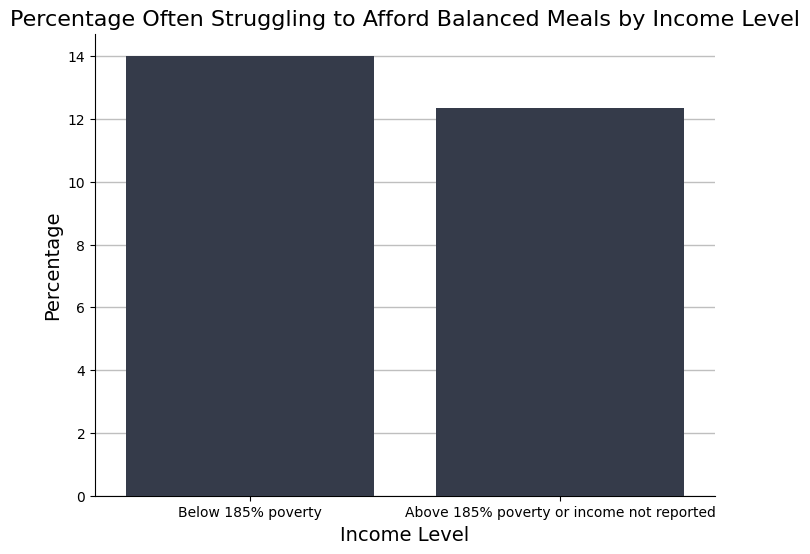

In [99]:
# MALNUTRITION 

import matplotlib.pyplot as plt
import seaborn as sns

#number of people who often struggle to afford balanced meals in each income group
struggling = census_food[census_food["Afford Balanced Meals"] == "Often true"]
struggling_count = struggling["Income Below 185% Poverty"].value_counts().rename("Struggling")

# percentage for each income group that's struggling
total_count = census_food["Income Below 185% Poverty"].value_counts().rename("Total")
income_data = pd.concat([struggling_count, total_count], axis=1, sort=False)
income_data["Percentage"] = (income_data["Struggling"] / income_data["Total"]) * 100

income_data.reset_index(inplace=True)
income_data.columns = ["Income Below 185% Poverty", "Struggling", "Total", "Percentage"]

plt.figure(figsize=(8, 6))
ax = sns.barplot(x="Income Below 185% Poverty", y="Percentage", data=income_data, color="#31394d", zorder=3) #color same as Google Slides theme

plt.title("Percentage Often Struggling to Afford Balanced Meals by Income Level", fontsize=16)
plt.ylabel("Percentage", fontsize=14)
plt.xlabel("Income Level", fontsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.grid(True, linestyle="-", linewidth=1, color="grey", alpha=0.5, zorder=2)

plt.show()


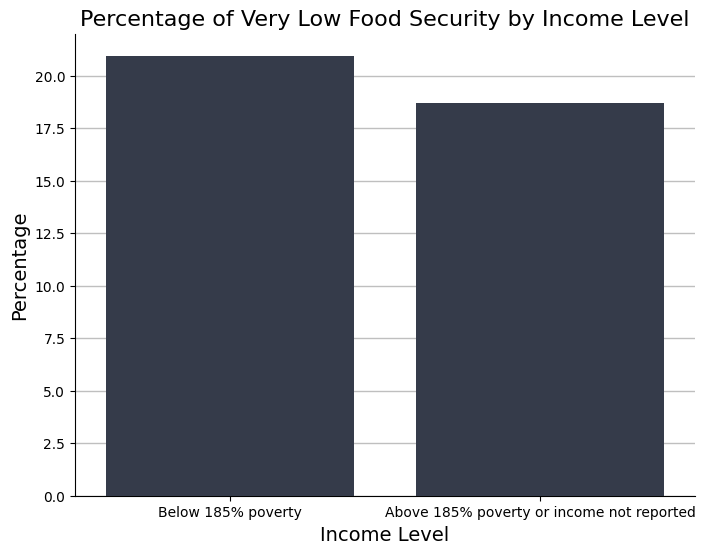

In [101]:
# FOOD SECURITY
#everything stays consistent, approach and style

very_low_food_security = census_food[census_food["Food Security Status"] == "Very Low Food Security"]
very_low_security_count = very_low_food_security["Income Below 185% Poverty"].value_counts().rename("Very Low Security")

total_count = census_food["Income Below 185% Poverty"].value_counts().rename("Total")

security_data = pd.concat([very_low_security_count, total_count], axis=1, sort=False)
security_data["Percentage"] = (security_data["Very Low Security"] / security_data["Total"]) * 100
security_data.reset_index(inplace=True)
security_data.columns = ["Income Below 185% Poverty", "Very Low Security", "Total", "Percentage"]

plt.figure(figsize=(8, 6))
ax = sns.barplot(x="Income Below 185% Poverty", y="Percentage", data=security_data, color="#31394d", zorder=3)

plt.title("Percentage of Very Low Food Security by Income Level", fontsize=16)
plt.ylabel("Percentage", fontsize=14)
plt.xlabel("Income Level", fontsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.grid(True, linestyle="-", linewidth=1, color="grey", alpha=0.5, zorder=2)

plt.show()


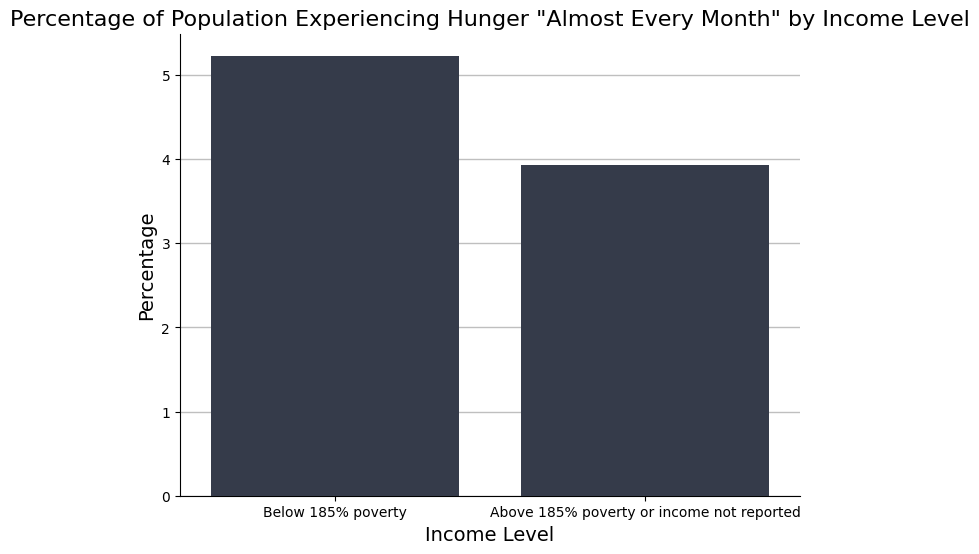

In [100]:
#STARVATION

starvation = census_food[census_food["Frequency of Hunger"] == "Almost every month"]
starvation_count = starvation["Income Below 185% Poverty"].value_counts().rename("Starving")

total_count = census_food["Income Below 185% Poverty"].value_counts().rename("Total")

hunger_data = pd.concat([starvation_count, total_count], axis=1, sort=False)
hunger_data["Percentage"] = (hunger_data["Starving"] / hunger_data["Total"]) * 100

hunger_data.reset_index(inplace=True)
hunger_data.columns = ["Income Below 185% Poverty", "Starving", "Total", "Percentage"]

plt.figure(figsize=(8, 6))
ax = sns.barplot(x="Income Below 185% Poverty", y="Percentage", data=hunger_data, color="#31394d", zorder=3)

plt.title('Percentage of Population Experiencing Hunger "Almost Every Month" by Income Level', fontsize=16)
plt.ylabel("Percentage", fontsize=14)
plt.xlabel("Income Level", fontsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.grid(True, linestyle="-", linewidth=1, color="grey", alpha=0.5, zorder=2)

plt.show()


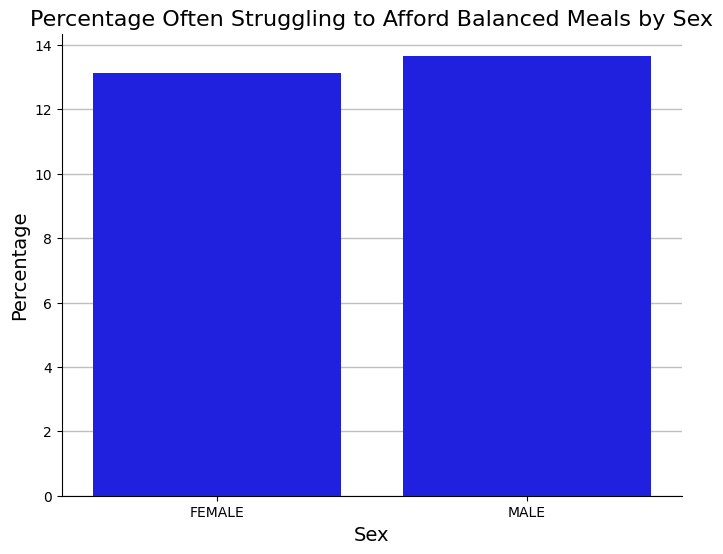

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

struggling = census_food[census_food["Afford Balanced Meals"] == "Often true"]
struggling_count = struggling["Sex"].value_counts().rename("Struggling")

total_count = census_food["Sex"].value_counts().rename("Total")

sex_data = pd.concat([struggling_count, total_count], axis=1, sort=False)
sex_data["Percentage"] = (sex_data["Struggling"] / sex_data["Total"]) * 100

sex_data.reset_index(inplace=True)
sex_data.columns = ["Sex", "Struggling", "Total", "Percentage"]

plt.figure(figsize=(8, 6))
ax = sns.barplot(x="Sex", y="Percentage", data=sex_data, color="blue", zorder=3)

plt.title("Percentage Often Struggling to Afford Balanced Meals by Sex", fontsize=16)
plt.ylabel("Percentage", fontsize=14)
plt.xlabel("Sex", fontsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.grid(True, linestyle="-", linewidth=1, color="grey", alpha=0.5, zorder=2)

plt.show()


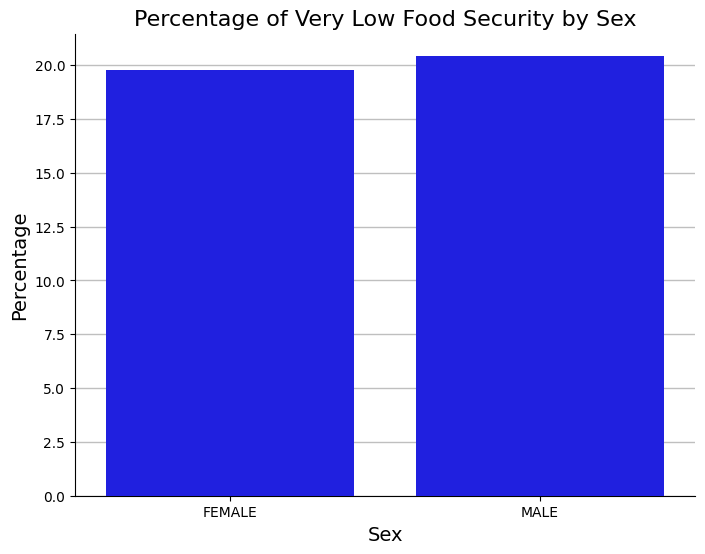

In [94]:
very_low_food_security = census_food[census_food["Food Security Status"] == "Very Low Food Security"]
very_low_security_count = very_low_food_security["Sex"].value_counts().rename("Very Low Security")

total_count = census_food["Sex"].value_counts().rename("Total")

security_data = pd.concat([very_low_security_count, total_count], axis=1, sort=False)
security_data["Percentage"] = (security_data["Very Low Security"] / security_data["Total"]) * 100
security_data.reset_index(inplace=True)
security_data.columns = ["Sex", "Very Low Security", "Total", "Percentage"]

plt.figure(figsize=(8, 6))
ax = sns.barplot(x="Sex", y="Percentage", data=security_data, color="blue", zorder=3)

plt.title("Percentage of Very Low Food Security by Sex", fontsize=16)
plt.ylabel("Percentage", fontsize=14)
plt.xlabel("Sex", fontsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.grid(True, linestyle="-", linewidth=1, color="grey", alpha=0.5, zorder=2)

plt.show()


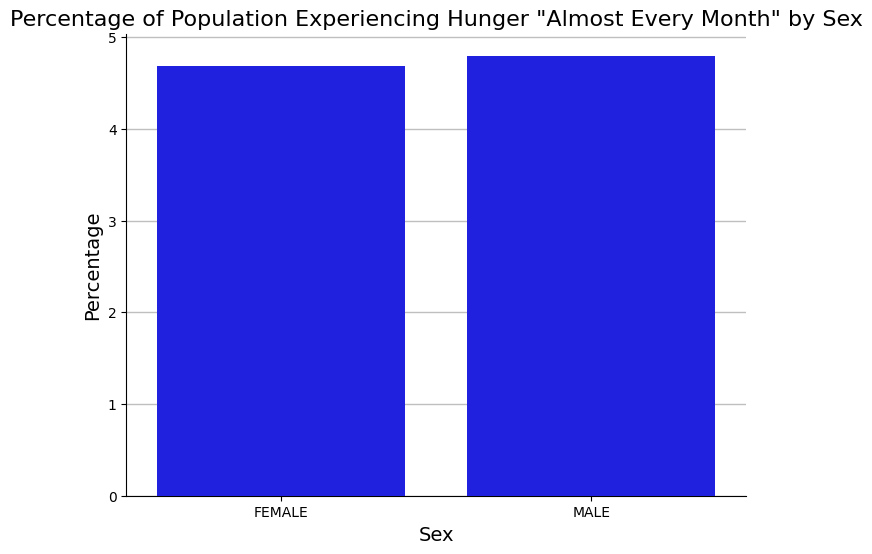

In [95]:
starvation = census_food[census_food["Frequency of Hunger"] == "Almost every month"]
starvation_count = starvation["Sex"].value_counts().rename("Starving")

total_count = census_food["Sex"].value_counts().rename("Total")

hunger_data = pd.concat([starvation_count, total_count], axis=1, sort=False)
hunger_data["Percentage"] = (hunger_data["Starving"] / hunger_data["Total"]) * 100
hunger_data.reset_index(inplace=True)
hunger_data.columns = ["Sex", "Starving", "Total", "Percentage"]

plt.figure(figsize=(8, 6))
ax = sns.barplot(x="Sex", y="Percentage", data=hunger_data, color="blue", zorder=3)

plt.title('Percentage of Population Experiencing Hunger "Almost Every Month" by Sex', fontsize=16)
plt.ylabel("Percentage", fontsize=14)
plt.xlabel("Sex", fontsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.grid(True, linestyle="-", linewidth=1, color="grey", alpha=0.5, zorder=2)

plt.show()


The analysis by sex doesn't look particularly interesting. Let's look instead at how food insecurity changes by age group. And we'll do this for 10 states...The 5 with the lowest poverty level (measured with respect to 185% poverty) and the 5 with the highest.

1. Create df grouped by state
2. Identify states with highest and lowest levels
3. Create age group column, filter df for only the 10 states
4. Plot slopegraph.

Taking a closer look at the above data, it seems a little dubious...we sort of were forced into using this dataset for the other analyses, but let's take a look at hte more reliable "Feeding America" data for this part. Let's follow the same approach...

In [96]:
df.columns = df.columns.str.strip() 

df_2021 = df[df["Year"] == 2021]

top_states = df_2021.nlargest(3, "Overall Food Insecurity Rate")
bottom_states = df_2021.nsmallest(3, "Overall Food Insecurity Rate")

selected_states = pd.concat([top_states, bottom_states])


/var/folders/28/xsh6qgd908q5ng87yxcxs6300000gn/T/ipykernel_88620/1096620651.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Child Food Insecurity Rate", "Senior Food Insecurity Rate"]) # shortening label on the right


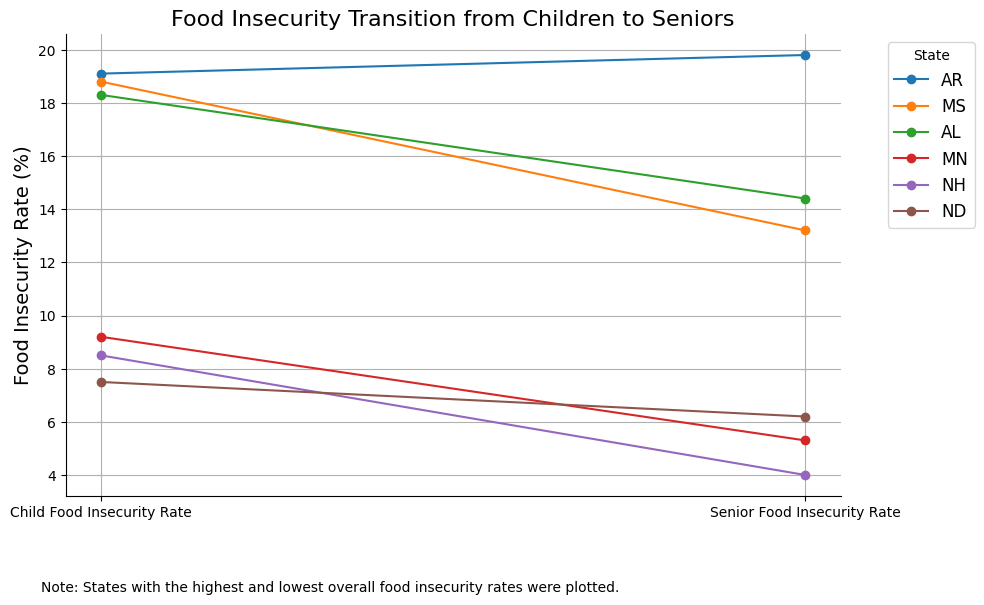

In [97]:
# Sort states using child food insecurity rate (thiis will improve legend)
sorted_states = slope_data[slope_data["Category"] == "Child Food Insecurity Rate"].sort_values(by="Rate", ascending=False)["State"].unique()

fig, ax = plt.subplots(figsize=(10, 6))

for state in sorted_states:
    state_data = slope_data[slope_data["State"] == state]
    ax.plot(state_data["Category"], state_data["Rate"], marker="o", label=state)

ax.set_title("Food Insecurity Transition from Children to Seniors", fontsize=16)
ax.set_ylabel("Food Insecurity Rate (%)", fontsize=14)


ax.set_xticklabels(["Child Food Insecurity Rate", "Senior Food Insecurity Rate"]) # shortening label on the right

ax.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)

plt.grid(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.figtext(0.1, -0.05, "Note: States with the highest and lowest overall food insecurity rates were plotted.", fontsize=10, ha="left")

plt.show()


In [98]:
selected_states[["State", "Child Food Insecurity Rate"]]

,State,Child Food Insecurity Rate
24,MS,0.188
3,AR,0.191
0,AL,0.183
34,ND,0.075
23,MN,0.092
29,NH,0.085
